In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

# 初始化训练集

In [2]:
loan_time_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/train/loan_time_train.txt",header=None,names=['u_id','loan_time'])
loan_time_train['loan_time'] = loan_time_train['loan_time'] // 86400 

In [3]:
user_info_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/train/user_info_train.txt",header=None,
                        names=['u_id','u_sex','u_job','u_edu','u_mrg','u_act'])

In [4]:
bill_detail_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/train/bill_detail_train.txt",header=None,
                        names=['u_id','time','b_id','pre_money','pre_repay','credit_amount','now_remain','now_least_pay',
                               'csm_num','now_money','adjust_my','cycle_ist','alb_remain','brw_amt','rpy_status'])
bill_detail_train['time'] = bill_detail_train['time'] // 86400
bill_detail_train = pd.merge(bill_detail_train,loan_time_train,how='inner',on='u_id')

In [5]:
browse_history_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/train/browse_history_train.txt",header=None,
                            names=['u_id','brs_time','brs_data','brs_sub_num'])
browse_history_train['brs_time'] = browse_history_train['brs_time'] // 86400

MemoryError: 

In [18]:
bank_detail_train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/train/bank_detail_train.txt",header=None,
                               names=['u_id','time','csm_type','csm_my','income_mark'])
bank_detail_train['time'] = bank_detail_train['time'] // 86400

In [19]:
train = pd.read_csv("D:/Files/QQFiles/935257580/FileRecv/personal loan/train/overdue_train.txt",header=None,names=['u_id','overdue'])
train = pd.merge(train,user_info_train,how='inner',on='u_id')
train = pd.merge(train,loan_time_train,how='inner',on='u_id')

In [42]:
# bill_train[(bill_train['time']>bill_train['loan_time'])].groupby(['u_id','time','b_id'],as_index=False)
# train[(train['u_id']==24)]
train

,u_id,overdue,u_sex,u_job,u_edu,u_mrg,u_act,loan_time
0,1,0,1,2,3,1,3,68458
1,2,0,1,2,3,2,1,68458
2,3,0,1,4,4,1,4,68458
3,4,1,1,4,4,3,2,68458
4,5,0,1,2,2,3,1,68458
5,6,1,1,2,4,1,3,68458
6,7,0,1,2,3,3,1,68458
7,8,0,1,2,4,1,2,68458
8,9,0,2,2,3,1,3,68458
9,10,0,1,3,4,3,2,68458


# 探索性数据分析EDA

### user_info 属性分析

In [22]:
sex_relate = train.groupby('u_sex',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
sex_relate['sex_od_rate'] = sex_relate['overdue']/sex_relate['total']
sex_relate

,u_sex,overdue,total,sex_od_rate
0,0,57,76,0.750000
1,1,358,2539,0.141000
2,2,43,385,0.111688


In [24]:
job_relate = train.groupby('u_job',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
job_relate['job_od_rate'] = job_relate['overdue']/job_relate['total']
job_relate

,u_job,overdue,total,job_od_rate
0,1,2,31,0.064516
1,2,315,2259,0.139442
2,3,38,215,0.176744
3,4,103,495,0.208081


In [25]:
mrg_relate = train.groupby('u_mrg',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
mrg_relate['mrg_od_rate'] = mrg_relate['overdue']/mrg_relate['total']
mrg_relate

,u_mrg,overdue,total,mrg_od_rate
0,0,0,1,0.000000
1,1,255,1625,0.156923
2,2,48,319,0.150470
3,3,145,963,0.150571
4,4,10,91,0.109890
5,5,0,1,0.000000


In [26]:
edu_relate = train.groupby('u_edu',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
edu_relate['edu_od_rate'] = edu_relate['overdue']/edu_relate['total']
edu_relate

,u_edu,overdue,total,edu_od_rate
0,1,1,19,0.052632
1,2,59,518,0.113900
2,3,186,1340,0.138806
3,4,212,1123,0.188780


In [27]:
act_relate = train.groupby('u_act',as_index=False)['overdue'].agg({'overdue':'sum','total':'count'})
act_relate['act_od_rate'] = act_relate['overdue']/act_relate['total']
act_relate

,u_act,overdue,total,act_od_rate
0,1,154,1107,0.139115
1,2,140,797,0.175659
2,3,78,610,0.127869
3,4,86,486,0.176955


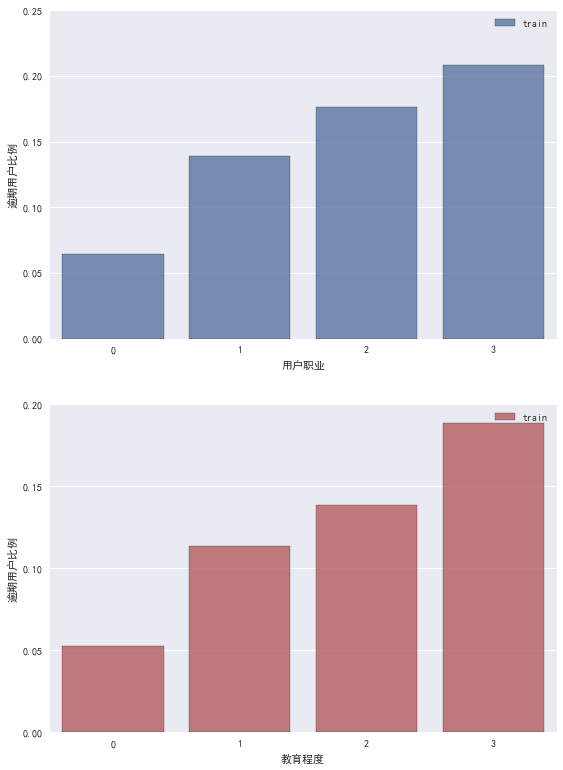

In [41]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(3, 2, 1)
ax1=sns.barplot(job_relate.index, job_relate.overdue/job_relate.total, alpha=0.8, color=p[0], label='train')
ax1.legend()
#ax1.set_title(u'职业分布情况') 
ax1.set_xlabel(u'用户职业')
ax1.set_ylabel(u'逾期用户比例')

# ax2 = fig.add_subplot(3, 2, 2)
# ax2=sns.barplot(sex_relate.index, edu_relate.overdue/edu_relate.total, alpha=0.8, color=p[1], label='train')
# ax2.legend()
# #ax2.set_title(u'性别分布情况') 
# ax2.set_xlabel(u'用户性别')
# ax2.set_ylabel(u'逾期用户比例')

ax3 = fig.add_subplot(3, 2, 3)
ax3=sns.barplot(edu_relate.index, edu_relate.overdue/edu_relate.total, alpha=0.8, color=p[2], label='train')
ax3.legend()
#ax3.set_title(u'教育程度分布') 
ax3.set_xlabel(u'教育程度')
ax3.set_ylabel(u'逾期用户比例')

# ax4 = fig.add_subplot(3, 2, 4)
# ax4=sns.barplot(mrg_relate.index, mrg_relate.overdue/mrg_relate.total, alpha=0.8, color=p[3], label='train')
# ax4.legend()
# #ax4.set_title(u'用户婚姻状态') 
# ax4.set_xlabel(u'用户婚姻状态')
# ax4.set_ylabel(u'逾期用户比例')

# ax5 = fig.add_subplot(3, 2, 5)
# ax5=sns.barplot(act_relate.index, act_relate.overdue/act_relate.total, alpha=0.8, color=p[4], label='train')
# ax5.legend()
# #ax5.set_title(u'用户户口类型') 
# ax5.set_xlabel(u'用户户口类型')
# ax5.set_ylabel(u'逾期用户比例')

plt.show()